In [1]:
from utils import *

% matplotlib inline
%load_ext autoreload
%autoreload 2

UsageError: Line magic function `%` not found.


## [Part 1] Embedding Periodic Signal

In [2]:
## Loading data and plotting the datapoints in 2D-space and the first coordinate 𝑥0(𝑡) against time.
data = pd.read_csv("takens_1.txt", sep = " ", header = None)
data = data.rename(columns={0: "x_0", 1: "x_1"})
length = len(data)
index = np.arange(length)

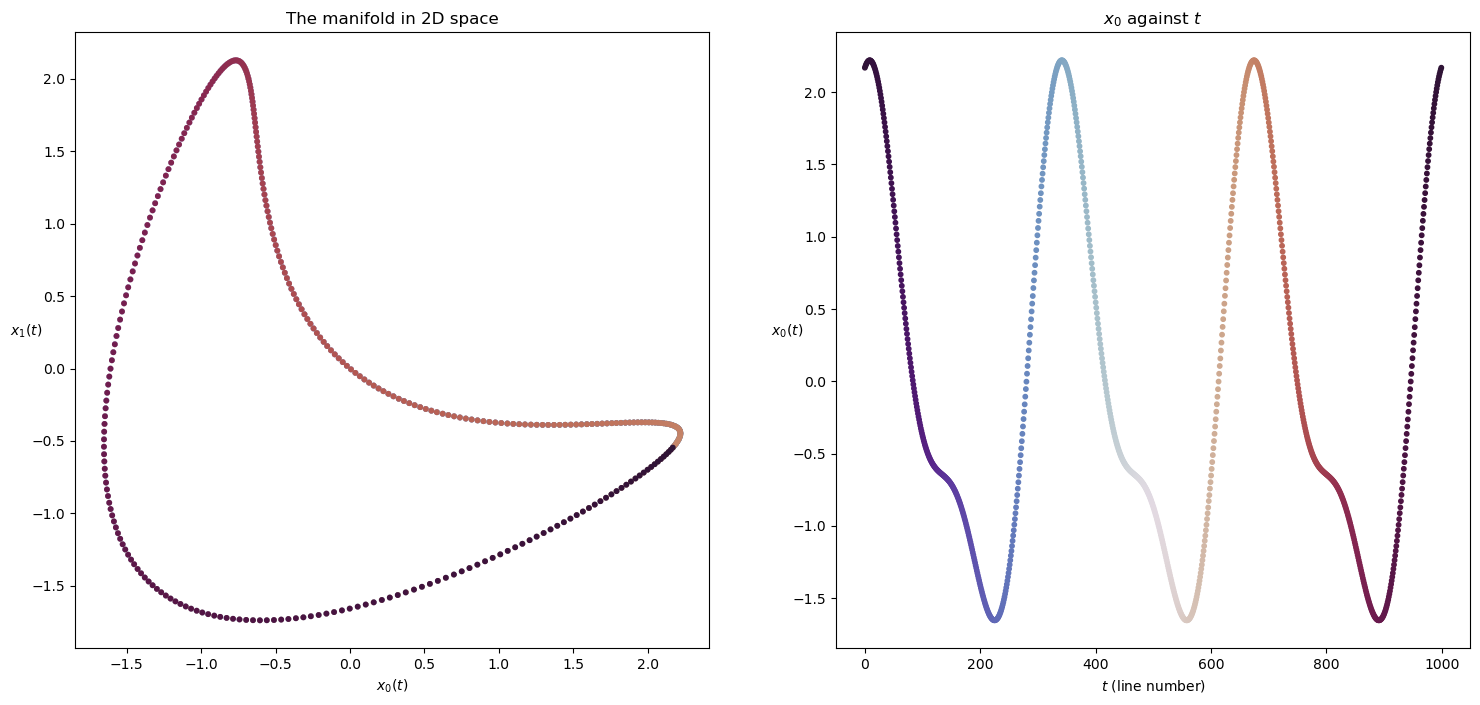

In [3]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))
ax0.scatter(data['x_0'], data['x_1'], c=index, cmap=plt.cm.twilight_shifted, s=10)
ax0.set_xlabel('$x_0(t)$')
ax0.set_ylabel('$x_1(t)$', rotation=0)
ax0.set_title('The manifold in 2D space')
ax1.scatter(index, data['x_0'], c=index, cmap=plt.cm.twilight_shifted, s=10)
ax1.set_xlabel('$t$ (line number)')
ax1.set_ylabel('$x_0(t)$', rotation=0)
ax1.set_title('$x_0$ against $t$')
plt.show()

In [4]:
def bar(delta_n):
    plot_shift(data_shift(data['x_0'], delta_n), 'x_0', delta_n)
    plot_shift(data_shift(data['x_1'], delta_n), 'x_1', delta_n)

length = data.shape[0]
interact(bar, delta_n=widgets.IntSlider(min=1, max=length, value=100))

interactive(children=(IntSlider(value=100, description='delta_n', max=1000, min=1), Output()), _dom_classes=('…

<function __main__.bar(delta_n)>

## [Part 2] Approximating Chaotic Dynamics 


In [5]:
Tend, dt = 20, 0.001
x, y, z = lorenz_calculate(Tend=Tend, dt=dt, x0=10, y0=10, z0=10, s=10, r=28, b=8/3)

In [6]:
def bar(delta_t):
    delta_n = int(delta_t / dt)
    plot_shift(data_shift(x, delta_n), 'x', delta_n)
    plot_shift(data_shift(y, delta_n), 'y', delta_n)
    plot_shift(data_shift(z, delta_n), 'z', delta_n)

interact(bar, delta_t=widgets.FloatSlider(min=0.05, max=Tend*0.05, step=0.05, value=0.1))

interactive(children=(FloatSlider(value=0.1, description='delta_t', max=1.0, min=0.05, step=0.05), Output()), …

<function __main__.bar(delta_t)>

Text(0.5, 1.0, 'Projection on $(x, y)$ surface')

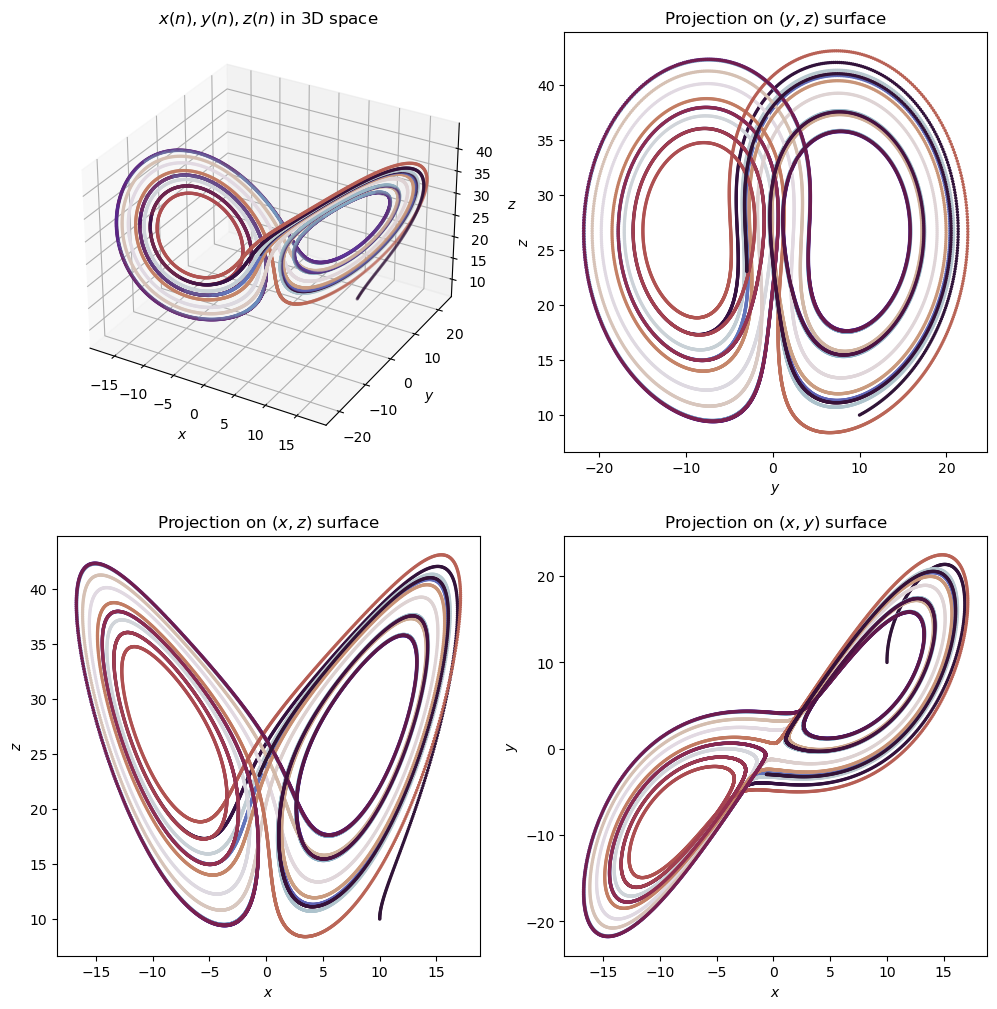

In [7]:
index = range(len(x))
fig = plt.figure(figsize=(12, 12))
ax0 = fig.add_subplot(221, projection='3d')
ax0.scatter(x, y, z, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax0.set_xlabel('$x$')
ax0.set_ylabel('$y$')
ax0.set_zlabel('$z$')
ax0.set_title('$x(n), y(n), z(n)$ in 3D space')

ax1 = fig.add_subplot(222)
ax1.scatter(y, z, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax1.set_xlabel('$y$')
ax1.set_ylabel('$z$')
ax1.set_title('Projection on $(y, z)$ surface')

ax2 = fig.add_subplot(223)
ax2.scatter(x, z, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$z$')
ax2.set_title('Projection on $(x, z)$ surface')

ax3 = fig.add_subplot(224)
ax3.scatter(x, y, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_title('Projection on $(x, y)$ surface')

## [Bonus]: Approximation of Vector Field 

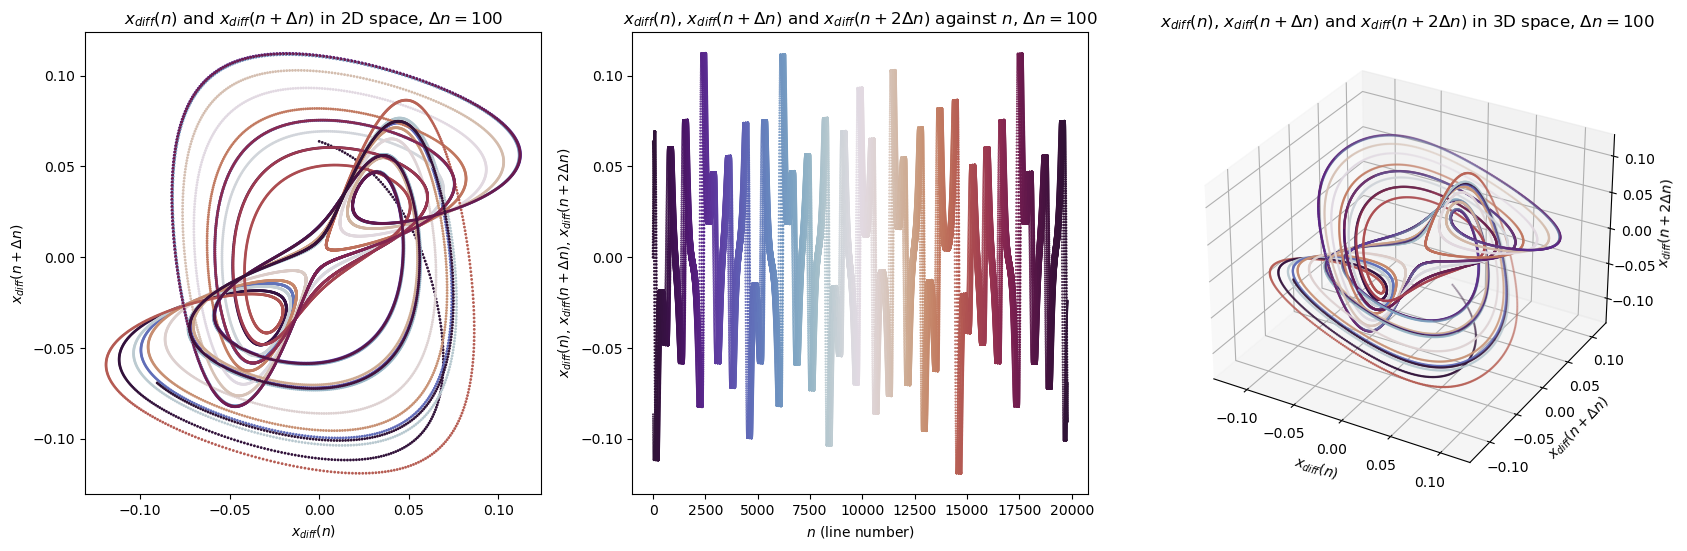

In [8]:
delta_t = 0.1
delta_n = int(delta_t / dt)
next_n = 1
positions, index = data_shift(x[:-next_n], delta_n)
targets, index = data_shift(x[next_n:], delta_n)

vectors = []
for i in range(3):
    vectors.append(targets[i] - positions[i])

length = len(vectors[0])
index = range(length)
plot_shift((vectors, index), 'x_{diff}', delta_n)

Text(0.5, 0.92, 'Reconstructed vector field')

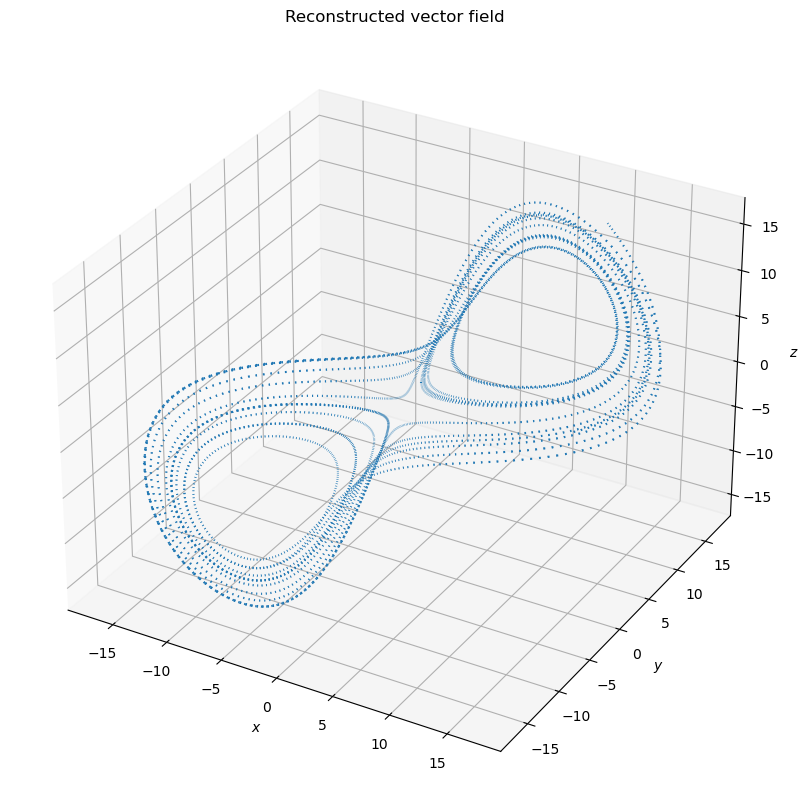

In [9]:
# concatenate the calculated positions and vectors into array of 3D vecs
positions_concatenated = np.concatenate(([positions[0]], [positions[1]], [positions[2]]))
vectors_concatenated = np.concatenate(([vectors[0]], [vectors[1]], [vectors[2]]))

# choose every 5th vector to plot
positions_plot = np.array([positions_concatenated[:,i] for i in range(0, length, 5)])
vectors_plot = np.array([vectors_concatenated[:,i] for i in range(0, length, 5)])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.quiver(*positions_plot.T, *vectors_plot.T)
ax.set_title('Reconstructed vector field')